### **Data Analyst Associate - Practical Exam**

In this notebook I am going to complete the practical exam required to obtain the certification as a Data Analyst Associate on DataCamp.

The objective of the exam is to analyze data from a pet products retailer. The shop is looking to increase sales by selling more of one of the kind of products they offer. 

The approach is going to be looking how repeat purchases impact sales, if there is a positive and valid correlation between them maybe the shop has to increase their offer on everyday products to achieve their goal. 

In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Reading the data
df = pd.read_csv("pet_supplies.csv", encoding= "utf-8")
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


#### Task 1

In this task we've got to check for every column in the dataset if it values matches the description on the table that we were given, state the missing values for each column and what we've done with those columns that didn't fit the description. 

In [31]:
# Getting to know the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [32]:
# We get the different values of every column to see if they match the description.
print(f'Category:\n{df["category"].value_counts()}\n')
print(f'Animal:\n{df["animal"].value_counts()}\n')
print(f'Size:\n{df["size"].value_counts()}\n')
print(f'Price:\n{df["price"].value_counts()}\n')
print(f'Sales:\n{df["sales"].value_counts()}\n')
print(f'Rating:\n{df["rating"].value_counts()}\n')
print(f'Repeat purchase:\n{df["repeat_purchase"].value_counts()}')

Category:
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

Animal:
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

Size:
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

Price:
unlisted    150
22.98        13
28           10
19.94         8
28.03         8
           ... 
19.84         1
35.82         1
43.97         1
32.91         1
21.25         1
Name: price, Length: 707, dtype: int64

Sales:
1034.36    3
998.18     2
790.28     2
1038.63    2
1085.60    2
          ..
465.62     1
709.87     1
816.48     1
1075.67    1
827.23     1
Name: sales, Length: 1476, dtype: int64

Rating:
5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64

Repeat purchase:
1    906
0    594
Name: repeat_pu

Given the information that we got before we can decide what are the things that are going to be modified to get the data accordingly to how is described on the table. 

First we take a look on the data type of each column. We can see that almost all columns are correct on their data type and the description given to us but we can see that the price columns is an object type when the description says that it has to be continuous so we must change it. 

Then if we look at shape of the dataset we see that it has 1500 entries with data so we get to know that the rating column is missing 150 values. The information given to us is that in order to get rid of those missing values we've got to replace them with zero (0).

Also We found that the price column has 150 entries with the value "unlisted" so we must take them as missing values. This missing values we are going to replace them with the overall median price. And we can see that the Category column got 25 values with '-' so they must be replaced with 'Unknown'


In [34]:
# Replacing missing values and datatype on price
median_price = df[df["price"] != "unlisted"]["price"].astype(np.float64).median()
print(f'Median price = {median_price}')

df["price"] = np.where(df["price"] == "unlisted", median_price, df["price"])
df["price"].astype(np.float64)

Median price = 28.064999999999998


0       51.10
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: float64

In [36]:
# Replacing missing values of Category and 
df["category"] = np.where(df["category"] == "-", "Unknown", df["category"])
df["category"].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

In [41]:
# Replacing missing values of Rating
df["rating"].fillna(0, inplace = True)
df["rating"].isna().sum()

0

#### Task 2 

In this task we are going to create a visualization that shows how many products are repeat purchases. With this visualization we are going to state which category of the variable repeat purchases has the most observations and explain whether the observations are balanced across categories of the variable repeat purchases. 

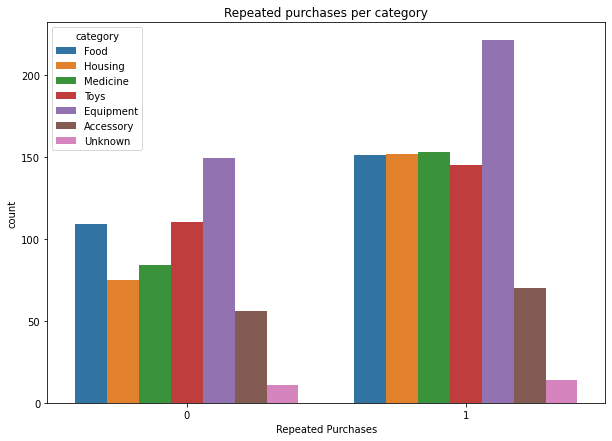

In [66]:
# Plotting repeated purchases and their categories
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = "repeat_purchase", hue = "category", dodge = True)
plt.title("Repeated purchases per category")
plt.xlabel("Repeated Purchases")
plt.show()

In this graph, we are going to see the comparison between repeated purchases.

At first glance, we can see that there are more purchases that are repeated than those that are not. Then, if we pay special attention to the categories in which repeated purchases are distributed, we can see that the distribution of Food, Housing, Medicine, and Toys is similar, with values close to 150.

It is also possible to see that there is a big difference for Equipment and Accessory with the rest. For the first one, we can see that it is the category that is repeated the most within the repeated purchases. For the second one, we can see that it is the one that is repeated the least. However, this does not allow us to draw conclusions about them, since this behavior occurs in both columns, both in the repeated and non-repeated ones, so it could be due to the number of products belonging to these categories.

To conclude, we can say that we are in a position to affirm that, in principle, the categories are distributed similarly across the "repeated purchases" variable.

#### Task 3

In this task we have to describe the distribution of all of the sales with a visualization included showing the distribution. 

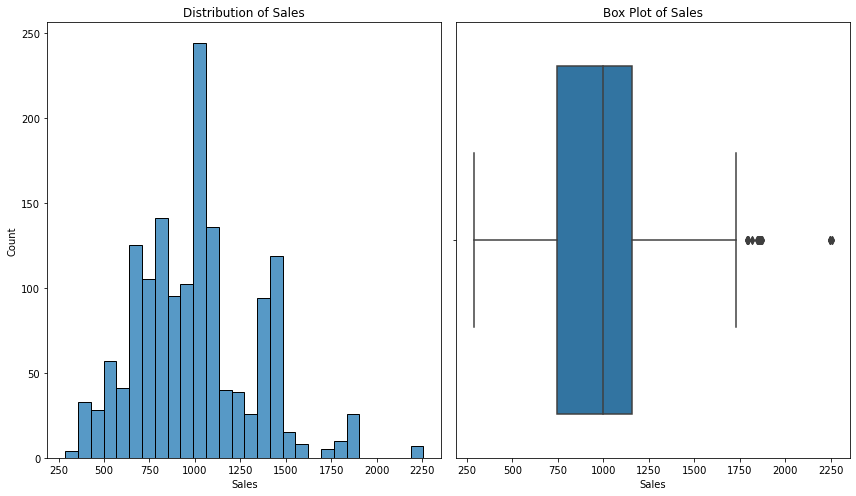

In [87]:
# As sales is continuous we are doing a histogram and a boxplot to understand the distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Histogram
sns.histplot(data=df, x="sales", ax=axes[0])
axes[0].set_xlabel("Sales")
axes[0].set_title("Distribution of Sales")

# Boxplot
sns.boxplot(data=df, x="sales", ax=axes[1])
axes[1].set_xlabel("Sales")
axes[1].set_title("Box Plot of Sales")

plt.tight_layout()
plt.show()

In [82]:
# We get a resume of the stats that will help to explain the distribution of sales
print(f'Sales Mean: {round(df["sales"].mean(),3)}\n')
print(f'Sales Median: {round(df["sales"].median(), 3)}\n')
print(f'Sales Standard Deviation: {round(df["sales"].std(),3)}')

Sales Mean: 996.598

Sales Median: 1000.83

Sales Standard Deviation: 323.953


In this particular case, we can see from the histogram of the variable that it appears to be distributed normally. This means that the majority of sales values are clustered around a central point, with fewer sales values appearing further away from this point on either side.

To better understand the central tendency and spread of the data, we can look at the mean, median, and standard deviation values of the "sales" variable. The mean value, which represents the average value of all the sales, is 996.59. The median value, which represents the middle value of the data when it is arranged in ascending or descending order, is 1000.83. This indicates that the sales data is roughly evenly distributed around this central point, with half of the sales values falling above this point and half falling below it.

The standard deviation, which measures the amount of variation or dispersion in the data from the mean value, is 323.95.

#### Task 4

In this task we have to describe the relationship between repeat purchases and sales. We are including a visualization to demonstrate this relationship. 

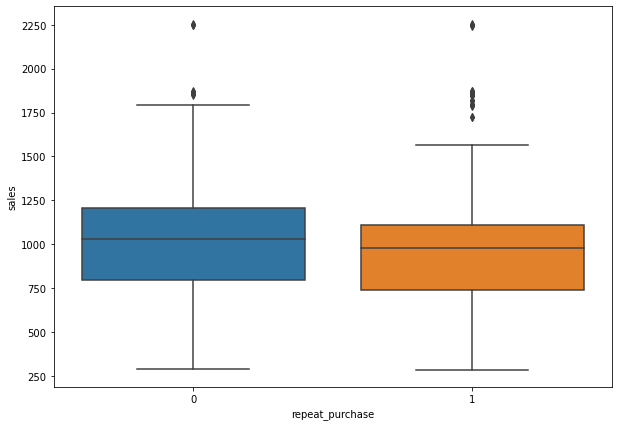

In [90]:
# First we compare distributions of repeat purchase by sales
plt.figure(figsize = (10,7))
sns.boxplot(data = df, x = "repeat_purchase", y = "sales")
plt.show()

In [101]:
# Then we obtain the summary stats for each group. 

# We split the data into two groups based on the category of repeat_purchase
repeat_sales = df[df['repeat_purchase'] == 1]['sales']
non_repeat_sales = df[df['repeat_purchase'] == 0]['sales']

# Non repeat sales
print(f'Non Repeat Sales\nMean: {non_repeat_sales.mean()}')
print(f'\nStd dev: {non_repeat_sales.std()}')
print(f'\nMedian: {non_repeat_sales.median()}')

# Repeat sales
print(f'\nRepeat Sales\nMean: {repeat_sales.mean()}')
print(f'\nStd dev: {repeat_sales.std()}')
print(f'\nMedian: {repeat_sales.median()}')

Non Repeat Sales
Mean: 1028.3680134680128

Std dev: 316.91576957793836

Median: 1030.185

Repeat Sales
Mean: 975.7683995584985

Std dev: 326.9854151304665

Median: 978.21


In [102]:
# We are going to do a t-test to compare the mean sales between the repeat and non repeat purchases.
from scipy.stats import ttest_ind


# Conduct a two-sample t-test to compare the mean sales between the two groups
t_stat, p_value = ttest_ind(repeat_sales, non_repeat_sales)

# Print the results of the t-test
print('T-statistic:', t_stat)
print('\nP-value:', p_value)

T-statistic: -3.084198268727848

P-value: 0.0020783246427295778


Based on the given results, it appears that there is a significant difference in sales between repeat and non-repeat purchases. The mean sales for non-repeat purchases is 1028.37, while the mean sales for repeat purchases is 975.77. This suggests that customers who make repeat purchases tend to spend less than those who do not make repeat purchases. Additionally, the standard deviation for non-repeat purchases is 316.92, which is slightly lower than the standard deviation for repeat purchases at 326.99. This could indicate that there is less variability in sales for non-repeat purchases.

Furthermore, the results of the t-test indicate that there is a statistically significant difference in mean sales between the two groups, with a t-statistic of -3.08 and a p-value of 0.002. This means that the probability of observing such a difference in mean sales between repeat and non-repeat purchases due to chance is very low. Therefore, we can conclude that there is a significant relationship between repeat purchases and sales, and that businesses should consider implementing strategies to encourage repeat purchases while also focusing on increasing the average spend per customer.